# Importing Data

In [1]:
import pandas as pd
import os
df = pd.read_csv(r"C:\Users\stuti\Documents\NTCC project\Breast-cancer-prediction-using-machine-learning-master\dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [3]:
df['diagnosis'] = df['diagnosis'].replace(['M', 'B'], [1,0])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Processing Dataset

In [4]:
pd.isnull(df).sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
print(df.dtypes)

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Splitting Dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import cross_val_score, cross_val_predict,cross_validate

In [8]:
Y = df['diagnosis']
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'smoothness_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]

#Splitting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=32)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

number of test samples : 57
number of training samples: 512


# Model Development and Evaluation

In [9]:
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc,precision_score,make_scorer

In [10]:
import numpy as np

In [11]:
import warnings
warnings.filterwarnings('ignore')

## Logistic Regression

In [12]:
model1 = LogisticRegression()
predicted = cross_val_predict(model1, X_test, Y_test,cv=10)
kfold = model_selection.KFold()
model1.fit(X_train,Y_train)
results = model_selection.cross_val_score(model1, X_test, Y_test, cv=10)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Precision:",metrics.precision_score(Y_test, predicted))
print("Recall:",metrics.recall_score(Y_test, predicted))

Accuracy: 89.667% (11.299%)
Precision: 0.8695652173913043
Recall: 0.8695652173913043


#### Confusion Matrix

In [13]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, predicted).ravel()
print(tn, fp, fn, tp)
confusion_matrix = [[tn, fp], [fn, tp]]

31 3 3 20


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sensitivity = (tp)/(tp+fn)
print('Sensitivity : ', sensitivity )
specificity = (tn)/(tn+fp)
print('Specificity : ', specificity)

Sensitivity :  0.8695652173913043
Specificity :  0.9117647058823529


Text(0.5, 257.44, 'Predicted label')

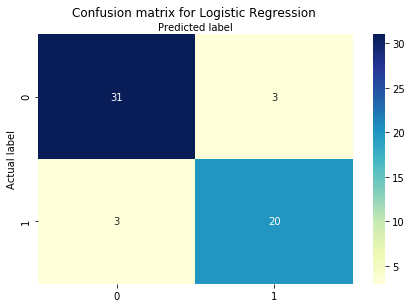

In [15]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression ', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

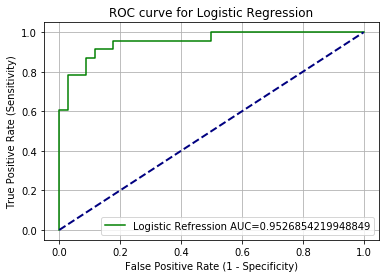

In [16]:
Y_pred_proba = model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
lw = 2
plt.plot(fpr,tpr,color='green',label="Logistic Refression AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

## Support Vector machine

In [17]:
from pandas import Series
from numpy import array

In [18]:
model2 = SVC()
predicted = cross_val_predict(model2, X_test, Y_test,cv=10)
kfold = model_selection.KFold()
model2=SVC(probability=True)
model2.fit(X_train,Y_train)
results = model_selection.cross_val_score(model2, X_test, Y_test, cv=10)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Precision:",metrics.precision_score(Y_test, predicted))
print("Recall:",metrics.recall_score(Y_test, predicted))

Accuracy: 84.333% (11.837%)
Precision: 0.8888888888888888
Recall: 0.6956521739130435


#### Confusion Matrix

In [19]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, predicted).ravel()
print(tn, fp, fn, tp)
confusion_matrix = [[tn, fp], [fn, tp]]

32 2 7 16


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sensitivity = (tp)/(tp+fn)
print('Sensitivity : ', sensitivity )
specificity = (tn)/(tn+fp)
print('Specificity : ', specificity)

Sensitivity :  0.6956521739130435
Specificity :  0.9411764705882353


Text(0.5, 257.44, 'Predicted label')

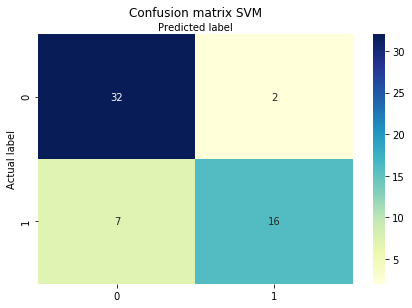

In [21]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

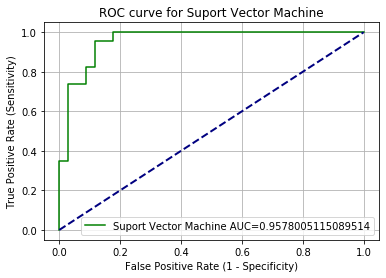

In [22]:
Y_pred_proba = model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
lw = 2
plt.plot(fpr,tpr,color='green',label="Suport Vector Machine AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title('ROC curve for Suport Vector Machine')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

## Decision Tree

In [23]:
model3 = DecisionTreeClassifier(random_state = 20)
predicted = cross_val_predict(model3, X_test, Y_test,cv=10)
kfold = model_selection.KFold()
model3.fit(X_train,Y_train)
results = model_selection.cross_val_score(model3, X_test, Y_test, cv=10)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Precision:",metrics.precision_score(Y_test, predicted))
print("Recall:",metrics.recall_score(Y_test, predicted))

Accuracy: 88.000% (15.144%)
Precision: 0.8333333333333334
Recall: 0.8695652173913043


#### Confusion Matrix

In [24]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, predicted).ravel()
print(tn, fp, fn, tp)
confusion_matrix = [[tn, fp], [fn, tp]]

30 4 3 20


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sensitivity = (tp)/(tp+fn)
print('Sensitivity : ', sensitivity )
specificity = (tn)/(tn+fp)
print('Specificity : ', specificity)

Sensitivity :  0.8695652173913043
Specificity :  0.8823529411764706


Text(0.5, 257.44, 'Predicted label')

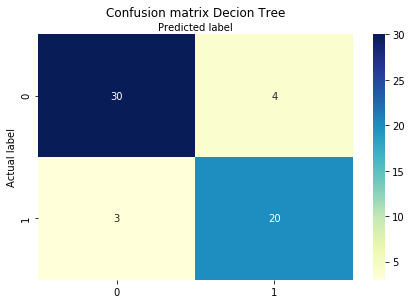

In [26]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decion Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

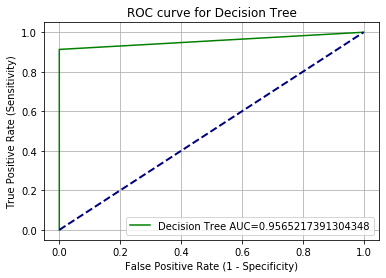

In [27]:
Y_pred_proba = model3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
lw = 2
plt.plot(fpr,tpr,color='green',label="Decision Tree AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title('ROC curve for Decision Tree')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

## Random Forest Classifier


In [28]:
model4 = RandomForestClassifier()
predicted = cross_val_predict(model4, X_test, Y_test,cv=10)
kfold = model_selection.KFold()
model4.fit(X_train,Y_train)
results = model_selection.cross_val_score(model4, X_test, Y_test, cv=10)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Precision:",metrics.precision_score(Y_test, predicted))
print("Recall:",metrics.recall_score(Y_test, predicted))

Accuracy: 95.000% (10.672%)
Precision: 1.0
Recall: 0.8260869565217391


#### Confusion Matrix

In [29]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, predicted).ravel()
print(tn, fp, fn, tp)
confusion_matrix = [[tn, fp], [fn, tp]]

34 0 4 19


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sensitivity = (tp)/(tp+fn)
print('Sensitivity : ', sensitivity )
specificity = (tn)/(tn+fp)
print('Specificity : ', specificity)

Sensitivity :  0.8260869565217391
Specificity :  1.0


Text(0.5, 257.44, 'Predicted label')

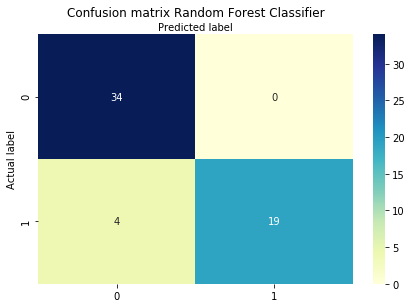

In [31]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Random Forest Classifier', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

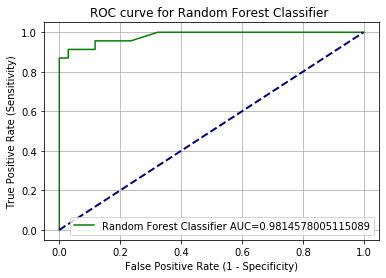

In [32]:
Y_pred_proba = model4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
lw = 2
plt.plot(fpr,tpr,color='green',label="Random Forest Classifier AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title('ROC curve for Random Forest Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

## AdaBoost

In [33]:
model5 = AdaBoostClassifier(random_state = 20)
predicted = cross_val_predict(model5, X_test, Y_test,cv=10)
kfold = model_selection.KFold()
model5.fit(X_train,Y_train)
results = model_selection.cross_val_score(model5, X_test, Y_test, cv=10)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
print("Precision:",metrics.precision_score(Y_test, predicted))
print("Recall:",metrics.recall_score(Y_test, predicted))

Accuracy: 96.667% (6.667%)
Precision: 0.9565217391304348
Recall: 0.9565217391304348


#### Confusion Matrix

In [34]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, predicted).ravel()
print(tn, fp, fn, tp)
confusion_matrix = [[tn, fp], [fn, tp]]

33 1 1 22


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sensitivity = (tp)/(tp+fn)
print('Sensitivity : ', sensitivity )
specificity = (tn)/(tn+fp)
print('Specificity : ', specificity)

Sensitivity :  0.9565217391304348
Specificity :  0.9705882352941176


Text(0.5, 257.44, 'Predicted label')

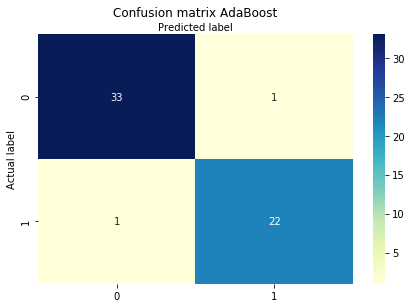

In [36]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix AdaBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### ROC Curve

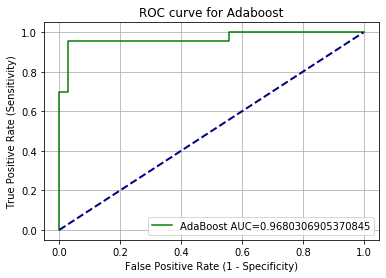

In [37]:
Y_pred_proba = model5.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
lw = 2
plt.plot(fpr,tpr,color='green',label="AdaBoost AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.legend(loc=4)
plt.title('ROC curve for Adaboost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

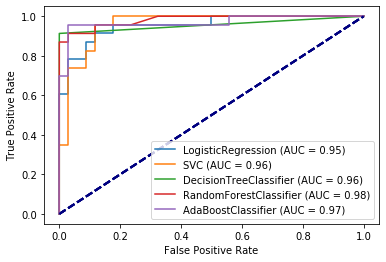

In [38]:
from sklearn.metrics import plot_roc_curve

classifiers = [model1, model2, model3, model4, model5]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, Y_test, ax=ax)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')